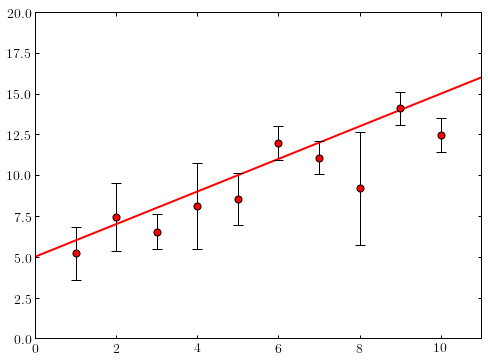

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import invgamma
%matplotlib inline

# Set the minimum error for each measurement.
error_floor = 0.25

m = 1
c = 5

x_vals = np.arange(1, 11).astype(float)
y_vals = m*x_vals + c

y_errs = 1. + np.random.randn(10)**2

y_vals += y_errs*np.random.randn(10)

x = np.arange(0, 11, 0.01)

plt.figure(figsize=(8, 6))
plt.xlim(0, 11)
plt.ylim(0, 20)
plt.plot(x, m*x + c, color="red")
plt.errorbar(x_vals, y_vals, y_errs, ls="", capsize=5, color="black", lw=1)
plt.scatter(x_vals, y_vals, color="red", lw=1, edgecolor="black", zorder=10, s=50)
plt.show()

In [23]:
def sample_m(param):
    
    c = param[1]
    
    mu_m_num = (np.sum(y_vals*x_vals/y_errs**2) - c*np.sum(x_vals/y_errs**2))
    inv_sigma_m_sq = np.sum(x_vals**2/y_errs**2)
    
    mu_m = mu_m_num/inv_sigma_m_sq
    sigma_m = 1./np.sqrt(inv_sigma_m_sq)
    
    return sigma_m*np.random.randn() + mu_m


def sample_c(param):

    m = param[0]

    mu_c_num = np.sum(y_vals/y_errs**2) - m*np.sum(x_vals/y_errs**2)
    inv_sigma_c_sq = np.sum(1./y_errs**2)
    
    mu_c = mu_c_num/inv_sigma_c_sq
    sigma_c = 1./np.sqrt(inv_sigma_c_sq)

    return sigma_c*np.random.randn() + mu_c

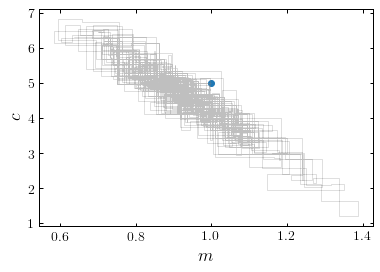

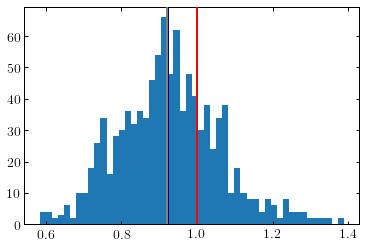

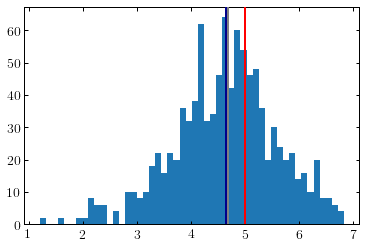

In [31]:
x = np.arange(0, 10, 0.01)

n_samples = 1000

param = np.zeros(2)
param[0] = 1.
param[1] = 5.

m_samp = np.zeros(n_samples)
c_samp = np.zeros(n_samples)
m_samp[0] = 1.
c_samp[0] = 5.

for i in range(1, n_samples):

    if i % 2:
        m_samp[i] = sample_m(param)
        c_samp[i] = c_samp[i-1]
        param[0] = np.copy(m_samp[i])

    else:
        c_samp[i] = sample_c(param)
        param[1] = np.copy(c_samp[i])
        m_samp[i] = m_samp[i-1]

        
plt.figure()
plt.scatter(m_samp[0], c_samp[0])
plt.plot(m_samp, c_samp, color="gray", alpha=0.5, lw=0.5)
plt.xlabel("$m$")
plt.ylabel("$c$")
plt.show()

plt.figure()
plt.hist(m_samp, bins=50)
plt.axvline(m, color="red", zorder=10)
plt.axvline(np.median(m_samp), color="darkblue", zorder=10)
plt.axvline(param_chi[0], color="gray", zorder=10)
plt.show()

plt.figure()
plt.hist(c_samp, bins=50)
plt.axvline(c, color="red", zorder=10)
plt.axvline(np.median(c_samp), color="darkblue", zorder=10)
plt.axvline(param_chi[1], color="gray", zorder=10)
plt.show()
